In [2]:
#! /usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, fftfreq

In [3]:
def sine_wave(nr_samples, duration, frequency):
    x = np.linspace(0., duration, nr_samples)
    y = np.sin(2 * np.pi * frequency * x / duration)
    
    return y

In [4]:
# Number of samples
N = 1024

# Time duration
D = 2.

# x goes from 0 to 1 in N steps
x = np.linspace(0., D, N)

# Frequencies in the signal
freq1 = 10
freq2 = 40
freq3 = 100

# In N samples, we're doing D seconds, and in those seconds, we're doing freq times 2*PI
y1 = 2.0 * sine_wave(N, D, freq1)
y2 = 2.0 * np.sin(2 * np.pi * freq2 * x / D)
y3 = 2.0 * np.sin(2 * np.pi * freq3 * x / D)

y = y1 + y2 + y3 + np.random.randn(N) * 5

Y=fft(y)

The output of the FFT 

In [9]:
# Array to translate n-th element of the FFT results to a particular X value, such that
# an x/y plot with 'freq' as x-axis and Y as y-axis shows up as the expected symmetric graph
freqs = fftfreq(N)

print(freqs)

[ 0.          0.00097656  0.00195312 ... -0.00292969 -0.00195312
 -0.00097656]


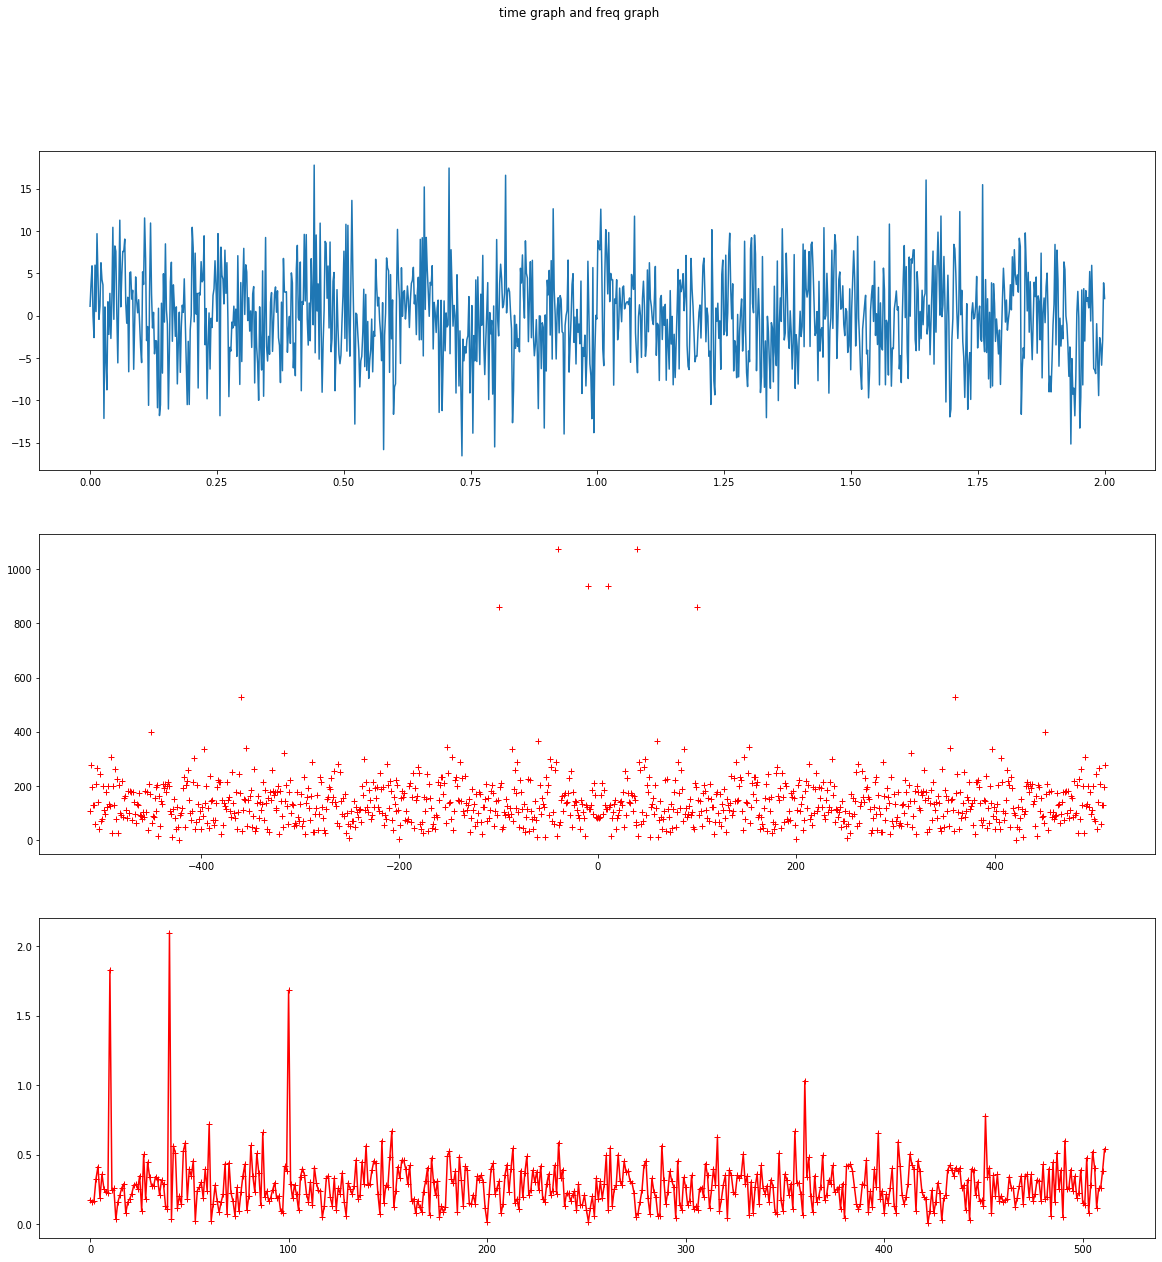

[ True  True  True ... False False False]


In [14]:
fig, (plt_time, plt_freq, plt_freq2) = plt.subplots(3)

plt.rcParams['figure.figsize'] = [20,20]

fig.suptitle("time graph and freq graph")
plt_time.plot(x,y)

# Multiply freq by number of samples -> the X axis will show the frequency of the signal.
plt_freq.plot(freqs * N, np.abs(Y), "r+")

# For a real world signal, there's no point in showing the negative frequencies.
# So filter all negative frequencies out and only display those.
# Also adjust the Y for the number of samples and multiply by 2 to account for the negative half.
x_mask = freqs >= 0

plt_freq2.plot(freqs[x_mask] * N, 2. / N * np.abs(Y)[x_mask], "r+-")

plt.show()

print(x_mask)